In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 데이터셋 인스턴스 생성

df = pd.read_csv(r"C:\ai_class\week13\AAME.csv")  # CSV 파일 경로
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
feature_cols = ['Open', 'High', 'Low', 'Close']
target_col   = ['Open']
data_X = df[feature_cols].values
data_y = df[target_col].values

In [4]:
data_X

array([[0.        , 4.05000019, 3.8499999 , 3.8499999 ],
       [0.        , 4.        , 3.79999995, 3.79999995],
       [0.        , 4.05000019, 3.8499999 , 3.8499999 ],
       ...,
       [2.25      , 2.25      , 2.13000011, 2.13000011],
       [2.1099999 , 2.1099999 , 2.1099999 , 2.1099999 ],
       [2.1099999 , 2.1500001 , 2.1099999 , 2.1500001 ]])

In [5]:
data_y

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [2.25     ],
       [2.1099999],
       [2.1099999]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_X = scaler_X.fit_transform(data_X)  # (N, 4)
scaled_y = scaler_y.fit_transform(data_y)  # (N, 1)


In [7]:
scaled_X

array([[0.        , 0.23515054, 0.2312812 , 0.22213181],
       [0.        , 0.23189585, 0.22795341, 0.21887713],
       [0.        , 0.23515054, 0.2312812 , 0.22213181],
       ...,
       [0.16304348, 0.1179821 , 0.11680534, 0.11017088],
       [0.15289854, 0.10886899, 0.11547421, 0.10886899],
       [0.15289854, 0.11147275, 0.11547421, 0.11147275]])

In [8]:
scaled_y

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.16304348],
       [0.15289854],
       [0.15289854]])

In [9]:
TEST_SIZE = 2000

X_train_val = scaled_X[:-TEST_SIZE]   # (N-2000, 4)
y_train_val = scaled_y[:-TEST_SIZE]   # (N-2000, 1)

X_test = scaled_X[-TEST_SIZE:]        # (2000, 4)
y_test = scaled_y[-TEST_SIZE:]        # (2000, 1)

print("X_train_val.shape =", X_train_val.shape)
print("y_train_val.shape =", y_train_val.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)


X_train_val.shape = (8098, 4)
y_train_val.shape = (8098, 1)
X_test.shape = (2000, 4)
y_test.shape = (2000, 1)


In [10]:
def make_sample_multi(feature_data, target_data, window):
    X_s, y_s = [], []
    for i in range(len(feature_data) - window):
        X_s.append(feature_data[i : i + window])     # (window, n_features)
        y_s.append(target_data[i + window])          # (1,) 형태
    return np.array(X_s), np.array(y_s)

In [11]:
window_size = 30
X_train, y_train = make_sample_multi(X_train_val, y_train_val, window_size)
print("X_train.shape =", X_train.shape)   # (train_val_size-window, window, 4)
print("y_train.shape =", y_train.shape)   # (train_val_size-window, 1)

X_train.shape = (8068, 30, 4)
y_train.shape = (8068, 1)


In [12]:
X_test_seq, y_test_seq = make_sample_multi(X_test, y_test, window_size)
print("X_test_seq.shape =", X_test_seq.shape)  # (2000-window, window, 4)
print("y_test_seq.shape =", y_test_seq.shape)  # (2000-window, 1)

X_test_seq.shape = (1970, 30, 4)
y_test_seq.shape = (1970, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(
    LSTM(
        units=16, 
        input_shape=(X_train.shape[1], X_train.shape[2]),  # (window_size, 4)
        activation='tanh',
        return_sequences=False
    )
)
model.add(Dense(1))
model.summary()

c:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 16)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1
)

Epoch 1/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0049 - val_loss: 1.1209e-04
Epoch 2/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0042 - val_loss: 7.8582e-05
Epoch 3/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0041 - val_loss: 4.2296e-05
Epoch 4/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0039 - val_loss: 1.2013e-04
Epoch 5/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0027 - val_loss: 3.6247e-05
Epoch 6/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0031 - val_loss: 5.2574e-05
Epoch 7/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0028 - val_loss: 4.5059e-05
Epoch 8/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0033 - val_loss: 5.0086e-05
Epoch 9/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0036 - val_loss: 6.6719e-05
Epoch 10/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0034 - val_loss: 6.5199e-05
Epoch 11/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0033 - val_loss: 5.4577e-

In [15]:
from sklearn.metrics import mean_squared_error
pred_scaled = model.predict(X_test_seq)

y_test_inv  = scaler_y.inverse_transform(y_test_seq)
pred_inv    = scaler_y.inverse_transform(pred_scaled)
mse_orig = mean_squared_error(y_test_inv, pred_inv)
print(f"[원본 단위] MSE = {mse_orig:.6f}")

mean_price = np.mean(y_test_inv)
rmse = np.sqrt(mse_orig)

print(f"평균 주가: {mean_price:.2f}원")
print(f"RMSE: {rmse:.4f}원 → 평균 대비 {rmse/mean_price*100:.2f}% 수준의 오차")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[원본 단위] MSE = 0.010153
평균 주가: 3.41원
RMSE: 0.1008원 → 평균 대비 2.96% 수준의 오차


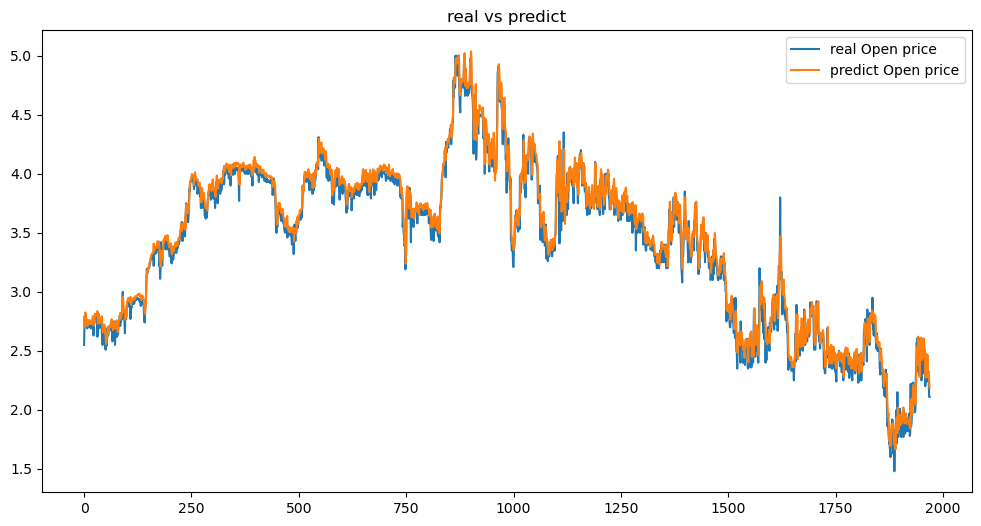

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv.flatten(), label='real Open price')
plt.plot(pred_inv.flatten(),   label='predict Open price')
plt.title("real vs predict")
plt.legend()
plt.show()